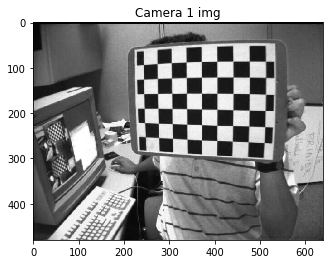

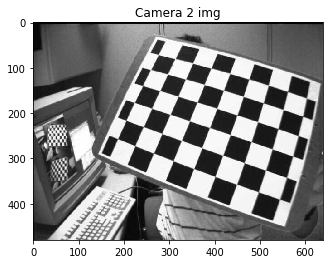

Homography matrix between camera 1 and 2, H: 
[[ 1.15459061e+00 -7.05674198e-01  4.31844880e+01]
 [ 3.69931849e-01  8.97014726e-01 -1.08350311e+02]
 [ 2.91862056e-05 -7.53829423e-04  1.00000000e+00]]


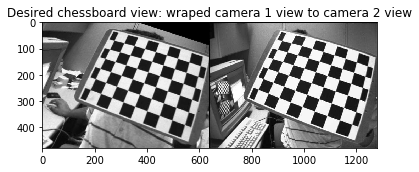

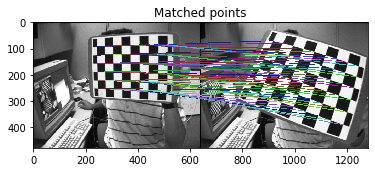

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



### Load chessboard img from two camera ###
img1 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\left01.jpg')
img2 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\left03.jpg')

plt.imshow(img1)
plt.title("Camera 1 img")
plt.show()

plt.imshow(img2)
plt.title("Camera 2 img")
plt.show()

grey1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grey2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


### find corners for each img ###
ret1, corners1 = cv2.findChessboardCorners(grey1, (9,6), None) # change (9,6) value based on image
ret2, corners2 = cv2.findChessboardCorners(grey2, (9,6), None)


### Estimate homography ###
H, status = cv2.findHomography(corners1, corners2)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
img1_warp = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
# [warp-chessboard]

img_draw_warp = cv2.hconcat([img1_warp,img2])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
corners1 = corners1.tolist()
corners1 = [a[0] for a in corners1]


# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([img1, img2])
for i in range(len(corners1)):
    pt1 = np.array([corners1[i][0], corners1[i][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, COLORS, 2)
    
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

### Camera Setup
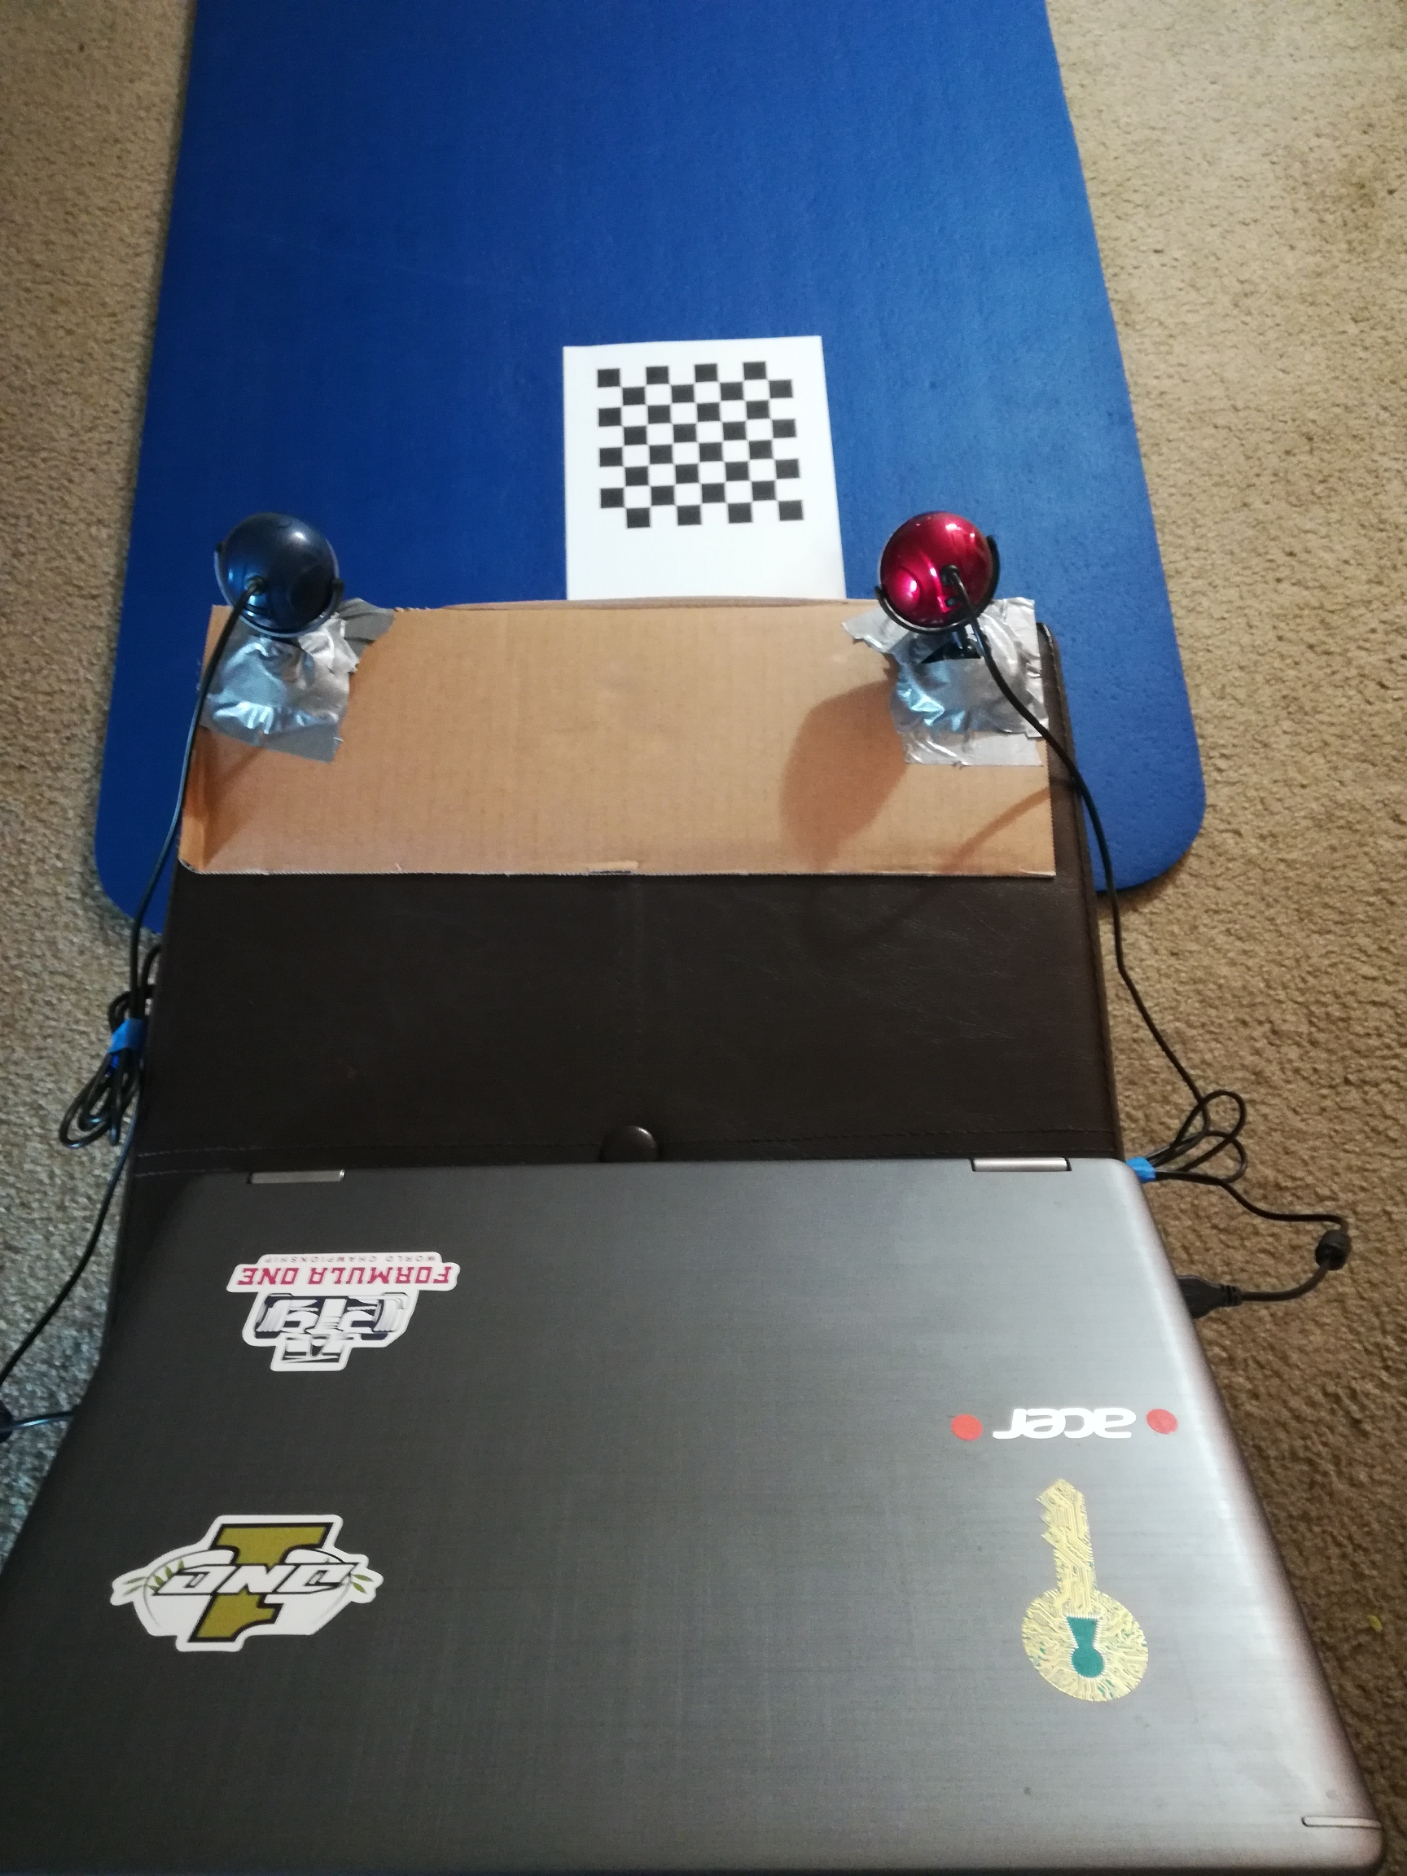
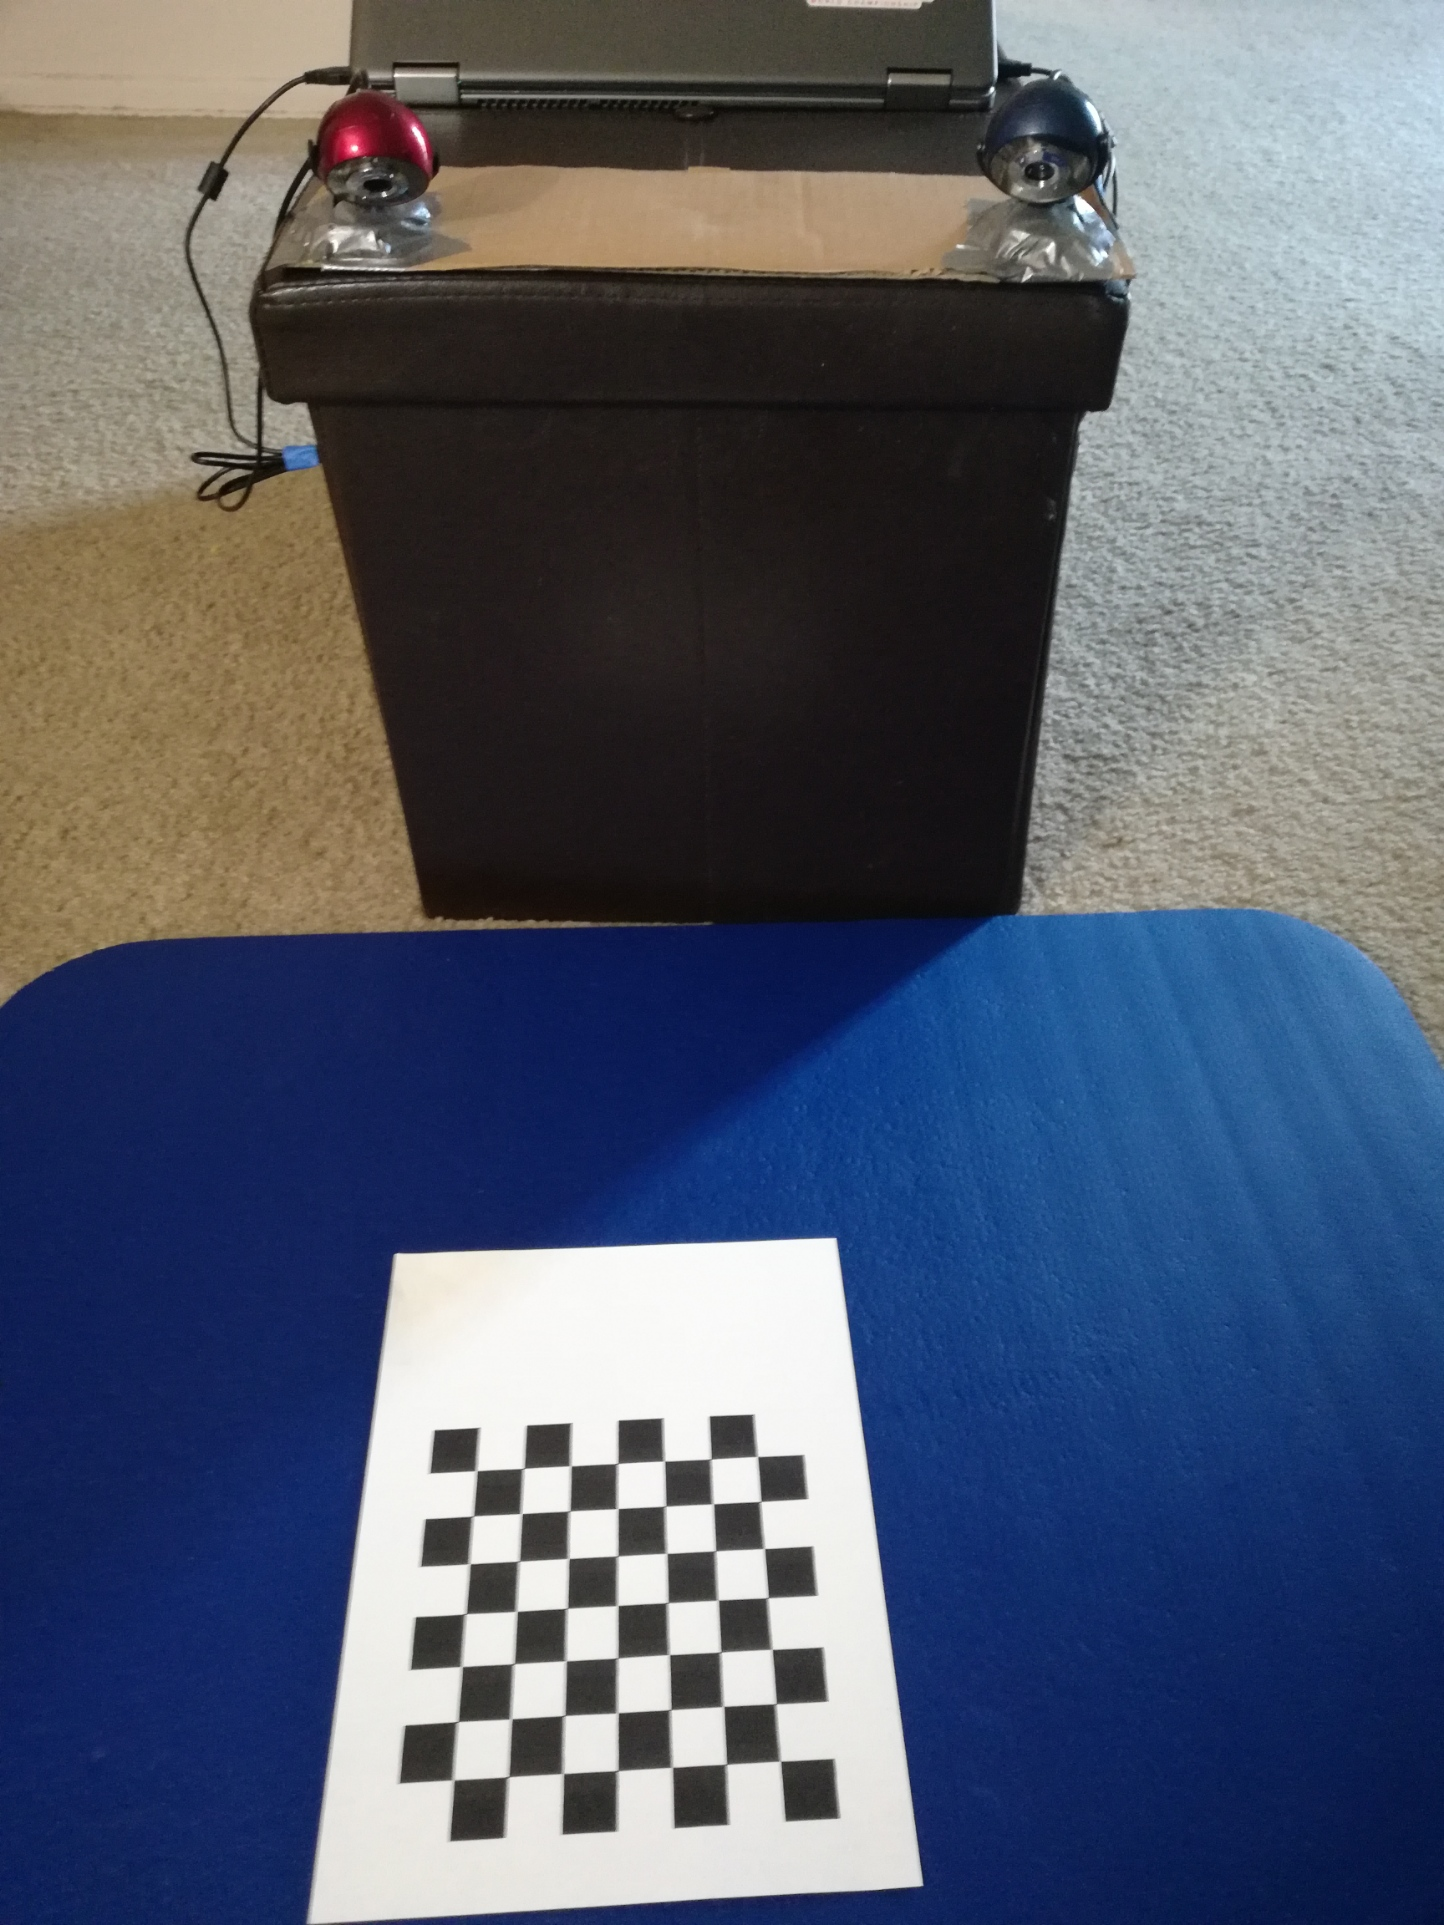

(720, 1280)


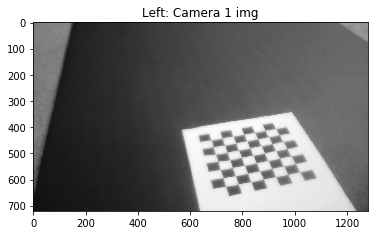

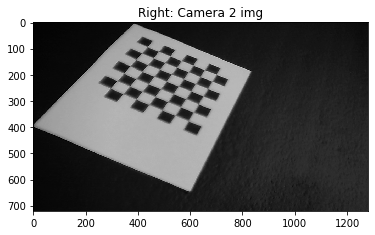

Homography matrix between camera 1 and 2, H: 
[[ 7.89135163e-01 -9.97092382e-01  3.48829225e+02]
 [ 5.38676949e-01  7.58962264e-01 -6.14861515e+02]
 [-1.08152124e-04  1.60749622e-04  1.00000000e+00]]


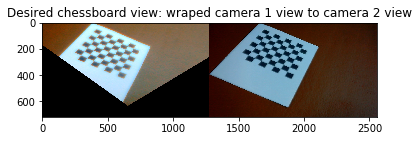

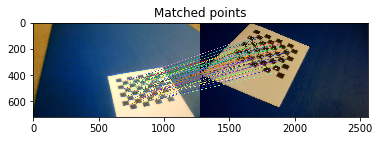

In [21]:


### Load chessboard img from two camera ###
## Left camera ##
img1 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_setup_img\left_camera.jpg')
## right camera ##
img2 = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_setup_img\right_camera.jpg')

# plt.imshow(img1)
# plt.title("Camera 1 img")
# plt.show()

# plt.imshow(img2)
# plt.title("Camera 2 img")
# plt.show()

grey1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
grey2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
print(grey1.shape)

plt.imshow(cv2.cvtColor(grey1, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(grey2, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### find corners for each img ###
ret1, corners1 = cv2.findChessboardCorners(grey1, (7,7), None) # change (9,6) value based on  checkerboard image
ret2, corners2 = cv2.findChessboardCorners(grey2, (7,7), None)

# print("img 1 corners")
# print(ret1, corners1)
# print("img 2 corners")
# print(ret2, corners2)


### Estimate homography ###
H, status = cv2.findHomography(corners1, corners2)
print("Homography matrix between camera 1 and 2, H: ")
print(H)


# [warp-chessboard]
img1_warp = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
# [warp-chessboard]

img_draw_warp = cv2.hconcat([img1_warp,img2])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


### Show which points matched
corners1 = corners1.tolist()
corners1 = [a[0] for a in corners1]


# [compute-transformed-corners]
img_draw_matches = cv2.hconcat([img1, img2])
for i in range(len(corners1)):
    pt1 = np.array([corners1[i][0], corners1[i][1], 1])
    pt1 = pt1.reshape(3, 1)
    pt2 = np.dot(H, pt1)
    pt2 = pt2/pt2[2]
    end = (int(img1.shape[1] + pt2[0]), int(pt2[1]))
    COLORS = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
    cv2.line(img_draw_matches, tuple([int(j) for j in corners1[i]]), end, COLORS, 2)
    
plt.imshow(cv2.cvtColor(img_draw_matches, cv2.COLOR_BGR2RGB))
plt.title("Matched points")
plt.show()

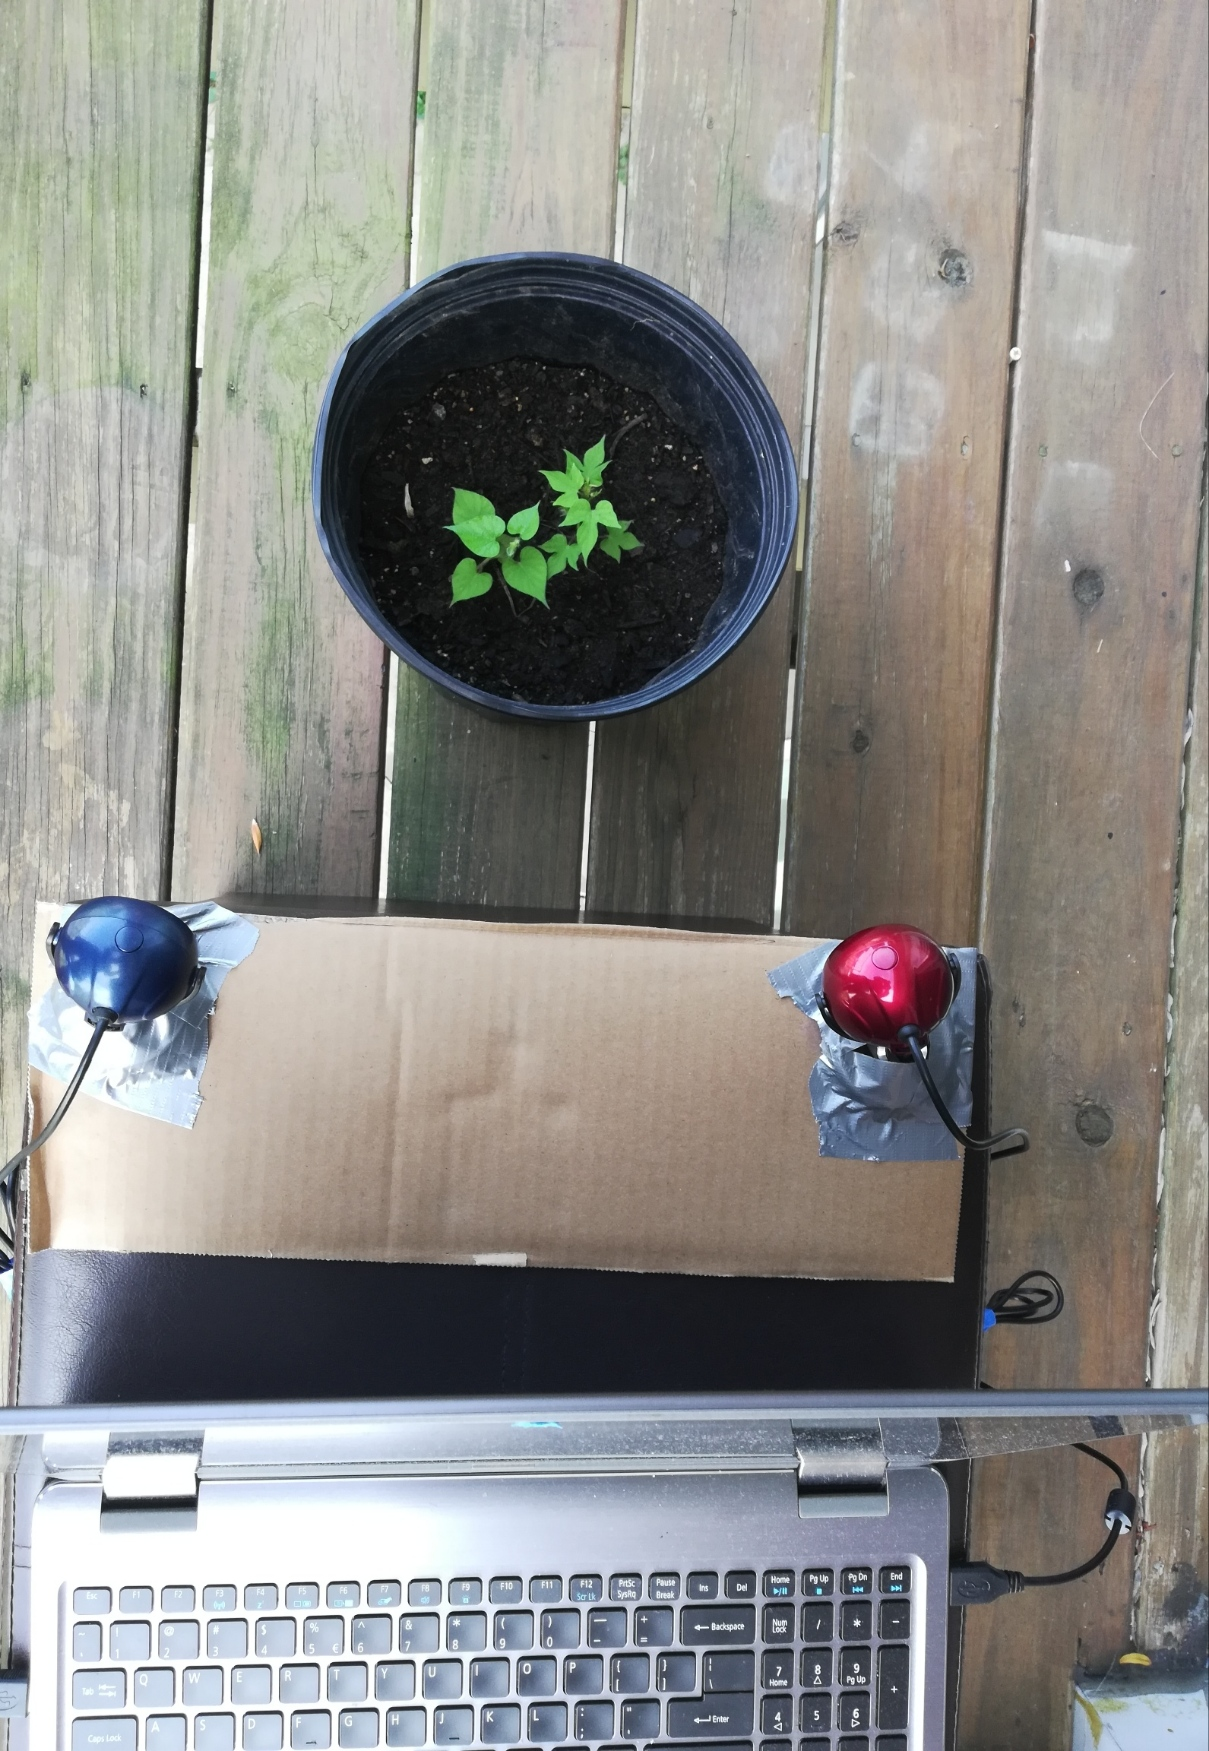

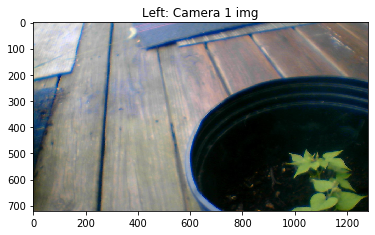

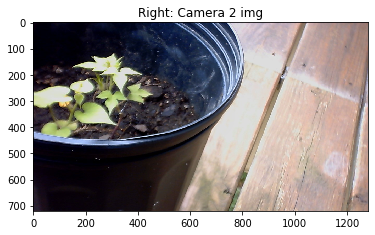

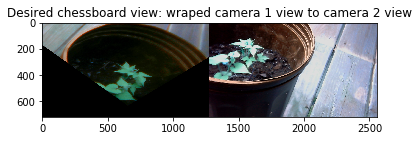

In [22]:
### Use camera homography matrix to superimpose weed image ###

### Load weed image ###
## Left camera ##
img1_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_weed_img\left_cam_ragweed.jpg')
## right camera ##
img2_weed = cv2.imread(r'C:\Users\khan1\Desktop\Projective_transform\two_camera_homography\camera_weed_img\right_cam_ragweed.jpg')

plt.imshow(cv2.cvtColor(img1_weed, cv2.COLOR_BGR2RGB))
plt.title("Left: Camera 1 img")
plt.show()

plt.imshow(cv2.cvtColor(img2_weed, cv2.COLOR_BGR2RGB))
plt.title("Right: Camera 2 img")
plt.show()


### Homography matrix is same from checkerboard image because camera position is same ###
H_cam = H

# [warp-camera-img]
img1_weed_warp = cv2.warpPerspective(img1_weed, H, (img1_weed.shape[1], img1_weed.shape[0]))


img_draw_warp = cv2.hconcat([img1_weed_warp,img2_weed])
plt.imshow(img_draw_warp)
plt.title("Desired chessboard view: wraped camera 1 view to camera 2 view")
plt.show()


In [ ]:
###  *** This is using SIFT to find corner points to calculate H ***
###  *** This can be implemented for any kind of images (not only chessboard) taken from two view ***
###  *** OpenCV-contrib is needed to acess SIFT/SURF ***


# import numpy as np
# import cv2

# def findHomography(img1, img2):

#     # define constants
#     MIN_MATCH_COUNT = 10
#     MIN_DIST_THRESHOLD = 0.7
#     RANSAC_REPROJ_THRESHOLD = 5.0

#     # Initiate SIFT detector
#     sift = cv2.xfeatures2d.SIFT_create()

#     # find the keypoints and descriptors with SIFT
#     kp1, des1 = sift.detectAndCompute(img1, None)
#     kp2, des2 = sift.detectAndCompute(img2, None)

#     # find matches
#     FLANN_INDEX_KDTREE = 1
#     index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
#     search_params = dict(checks=50)

#     flann = cv2.FlannBasedMatcher(index_params, search_params)
#     matches = flann.knnMatch(des1, des2, k=2)

#     # store all the good matches as per Lowe's ratio test.
#     good = []
#     for m, n in matches:
#         if m.distance < MIN_DIST_THRESHOLD * n.distance:
#             good.append(m)


#     if len(good) > MIN_MATCH_COUNT:
#         src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
#         dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

#         H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, RANSAC_REPROJ_THRESHOLD)
#         return H

#     else: raise Exception("Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT))
        
# H_sift = findHomography(img1,img2)
# print(H_sift)